In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report


In [4]:
df = pd.read_csv('Student Depression Dataset.csv')

In [6]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [8]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27893.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27898.000000,27901.000000
mean,70442.149421,25.822500,3.141214,0.000430,7.656104,2.943837,0.000681,7.157036,3.139867,0.585499
std,40641.175216,4.905979,1.381465,0.043992,1.470707,1.361148,0.044394,3.707748,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [10]:
df.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27896,27900,27901,27896,27901,27897,27901,27897
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15543,1570,27870,8306,10317,6078,17656,14397


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27896 non-null  object 
 2   Age                                    27893 non-null  float64
 3   City                                   27900 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27896 non-null  object 
 11  Di

In [14]:
df.isnull().sum()

id                                       0
Gender                                   5
Age                                      8
City                                     1
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           5
Dietary Habits                           0
Degree                                   4
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         3
Financial Stress                         3
Family History of Mental Illness         4
Depression                               0
dtype: int64

In [18]:
df.shape

(27901, 18)

In [20]:
target = "Depression"

In [22]:
df[target].unique()

array([1, 0])

In [24]:
df[target].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [ ]:
# 2.2 Fill missing values
# - For numeric columns: fill with median
# - For categorical columns: fill with mode (most common value)

In [26]:
num_col =  df.select_dtypes(include=['int64','float64']).columns
cat_col = df.select_dtypes(include=['object']).columns

In [28]:
for col in num_col:
    df[col] = df[col].fillna(df[col].median())

In [32]:
for col in cat_col:
    df[col] =  df[col].fillna(df[col].mode()[0])

In [34]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [36]:
# 2.3 Convert categorical (text) columns to numbers using get_dummies
# This creates 0/1 columns for each category
df = pd.get_dummies(df,columns=cat_col ,drop_first=True)

In [38]:
df.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5,0,8.97,2,0,3.0,1.0,1,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,2,0,5.90,5,0,3.0,2.0,0,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,3,0,7.03,5,0,9.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,3,0,5.59,2,0,4.0,5.0,1,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,4,0,8.13,3,0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,True,False


In [40]:
print("Shape after encoding:",df.shape)


Shape after encoding: (27901, 111)


In [ ]:
#Step 3: Exploratory Data Analysis (EDA)
# 5. Perform basic EDA to understand the data:
# o Plot the distribution of the target variable.
# o Create visualizations (e.g., histograms, boxplots) to analyze feature relationships. 
# o Calculate correlations between features.

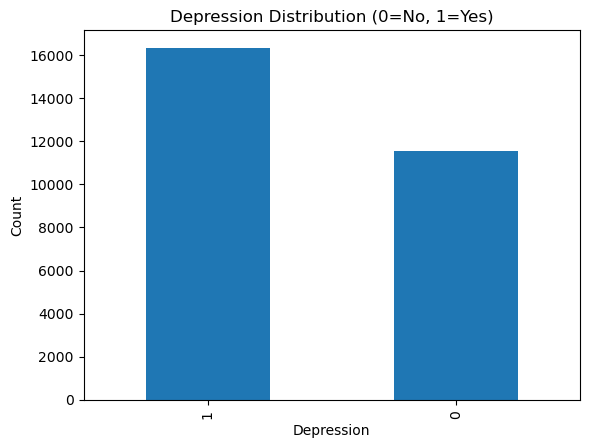

In [42]:
#Target Distribution
plt.figure()
df[target].value_counts().plot(kind='bar')
plt.title("Depression Distribution (0=No, 1=Yes)")
plt.xlabel("Depression")
plt.ylabel("Count")
plt.show()

In [44]:

# 3.2 Quick correlation with target (top 10 related features)
corr_with_target = df.corr(numeric_only=True)[target].sort_values(ascending=False)
print("\nTop 10 positive correlations with target:\n", corr_with_target.head(10))
print("\nTop 10 negative correlations with target:\n", corr_with_target.tail(10))


Top 10 positive correlations with target:
 Depression                                   1.000000
Have you ever had suicidal thoughts ?_Yes    0.546277
Academic Pressure                            0.474835
Financial Stress                             0.363574
Work/Study Hours                             0.208561
Dietary Habits_Unhealthy                     0.189352
Degree_Class 12                              0.131101
Sleep Duration_Less than 5 hours             0.078894
Family History of Mental Illness_Yes         0.053250
City_Hyderabad                               0.038255
Name: Depression, dtype: float64

Top 10 negative correlations with target:
 City_Agra                          -0.020817
Degree_B.Ed                        -0.021000
Profession_Student                 -0.021510
City_Jaipur                        -0.024462
Degree_M.Ed                        -0.028477
Degree_M.Tech                      -0.030144
Dietary Habits_Moderate            -0.038108
Sleep Duration_More than

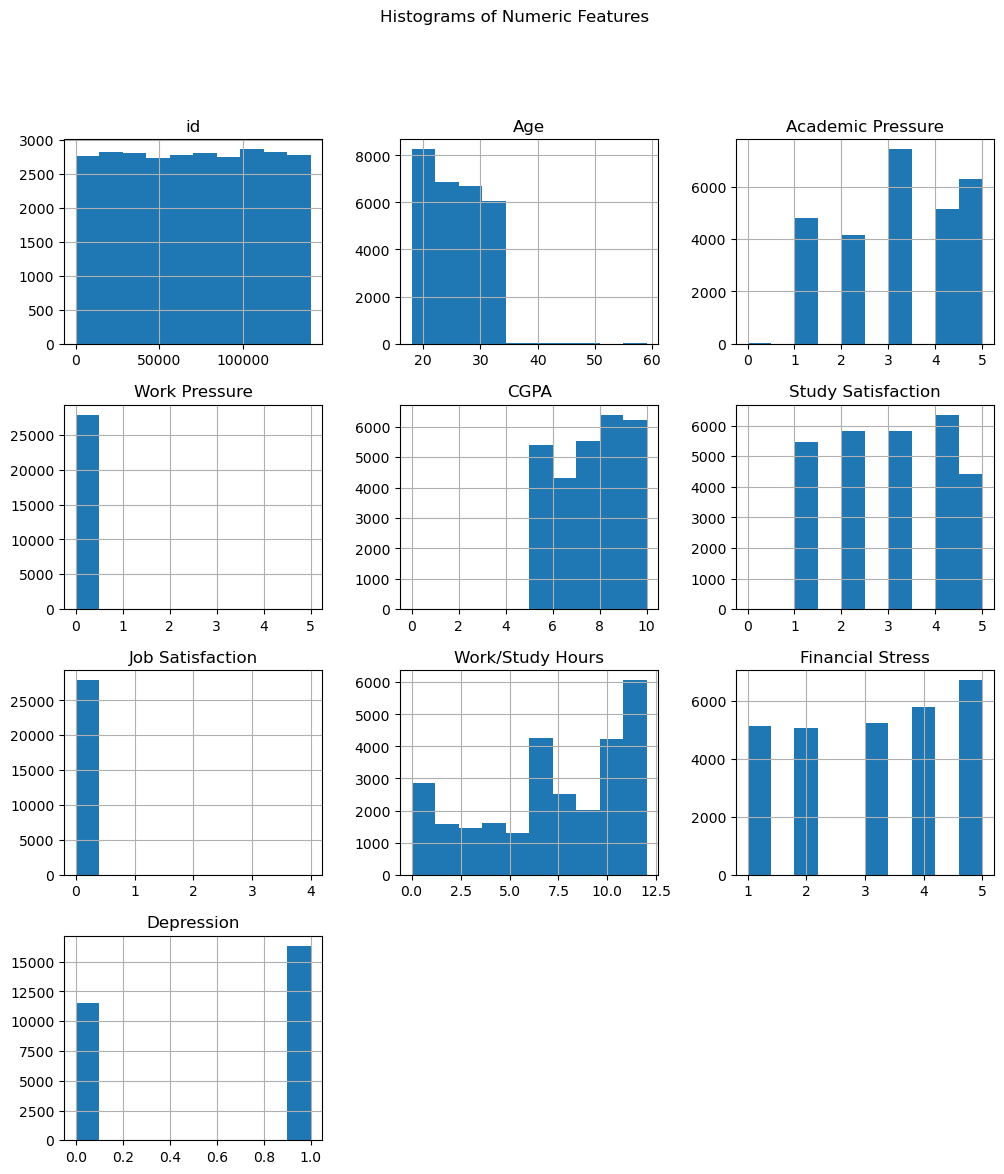

In [50]:
# Histograms for numeric features
num_cols = df.select_dtypes(include=["int64","float64"]).columns

df[num_cols].hist(figsize=(12,13))
plt.suptitle("Histograms of Numeric Features")
plt.show()

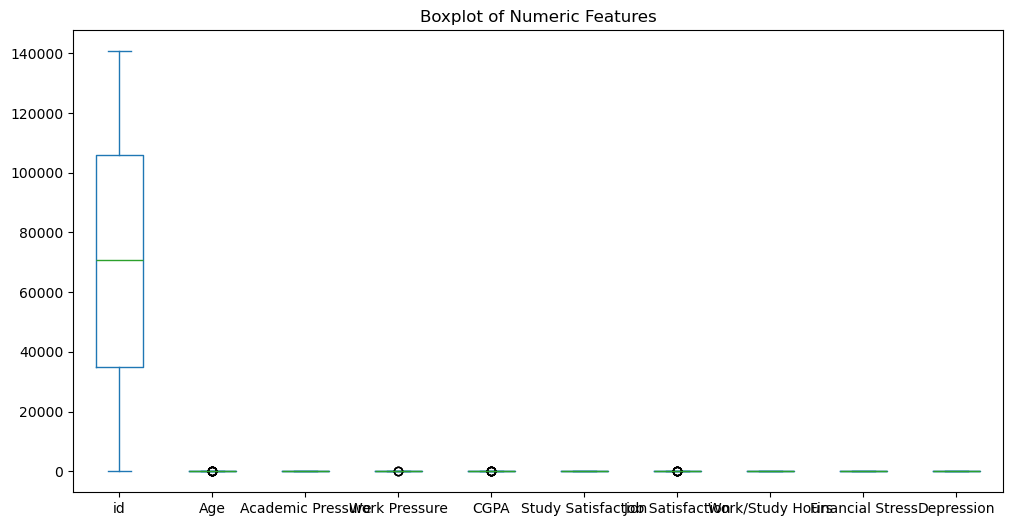

In [52]:
#) Boxplots (to find outliers)
df[num_cols].plot(kind="box", figsize=(12,6))
plt.title("Boxplot of Numeric Features")
plt.show()

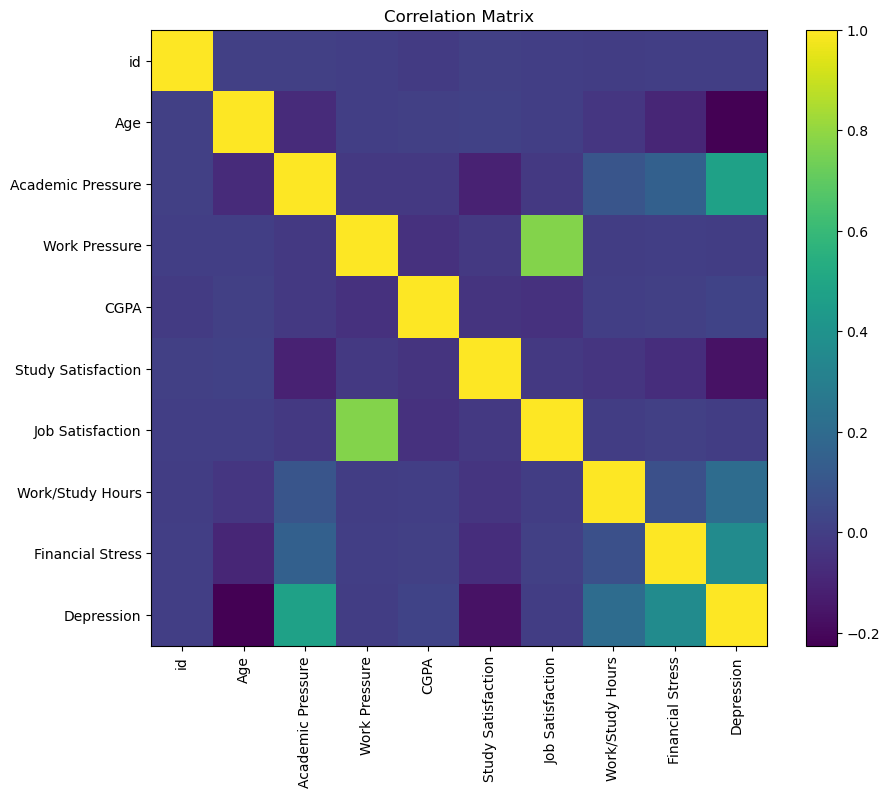

Correlation with Depression:

Depression            1.000000
Academic Pressure     0.474835
Financial Stress      0.363574
Work/Study Hours      0.208561
CGPA                  0.022210
id                    0.000923
Work Pressure        -0.003351
Job Satisfaction     -0.003482
Study Satisfaction   -0.167971
Age                  -0.226417
Name: Depression, dtype: float64


In [54]:
#4) Correlation between features
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Matrix")
plt.show()

# Correlation with target
print("Correlation with Depression:\n")
print(corr["Depression"].sort_values(ascending=False))


In [56]:
# Step 4: Model Building and Training
# 7. Split the dataset into training (70%) and testing (30%) subsets.
# 8. Train a classification model on the training set.

X = df.drop(columns= [target])

In [58]:
X

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5,0,8.97,2,0,3.0,1.0,True,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,2,0,5.90,5,0,3.0,2.0,False,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,3,0,7.03,5,0,9.0,1.0,True,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,3,0,5.59,2,0,4.0,5.0,False,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,4,0,8.13,3,0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5,0,5.75,5,0,7.0,1.0,False,...,False,False,False,False,False,False,False,False,True,True
27897,140686,27.0,2,0,9.40,3,0,0.0,3.0,True,...,False,False,False,False,False,True,False,False,False,True
27898,140689,31.0,3,0,6.61,4,0,12.0,2.0,True,...,False,False,True,False,False,False,False,False,False,False
27899,140690,18.0,5,0,6.88,2,0,10.0,5.0,False,...,False,False,False,False,False,False,False,False,True,False


In [60]:
y = df[target]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [81]:
#Train model
model = LogisticRegression(max_iter=10000)

In [83]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [85]:
y_pred = model.predict(X_test)

In [87]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.841237606020786

Confusion Matrix:
 [[2764  741]
 [ 588 4278]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      3505
           1       0.85      0.88      0.87      4866

    accuracy                           0.84      8371
   macro avg       0.84      0.83      0.84      8371
weighted avg       0.84      0.84      0.84      8371



In [ ]:
# You can write:
# Accuracy shows overall correctness of the model.
# Confusion Matrix shows how many students were correctly and incorrectly classified.
# Precision tells how reliable positive predictions are.
# Recall tells how many actual depressed students were correctly found.
# F1-score balances precision and recall.
# Classification report summarizes all metrics clearly.

In [89]:
precision_score(y_test,y_pred)

0.8523610280932457

In [ ]:
# 4) Final Summary (For Assignment)
# You can write:
# The model achieved an accuracy of 84%.
# It correctly classified 4278 depressed and 2764 non-depressed students.
# Precision and recall are higher for depressed class, meaning the model is good at identifying students with depression.
# The F1-score of 0.87 for depressed class shows strong and balanced performance.
# # ÷Overall, the model performs well and can be used as a reliable baseline for depression prediction